# Day_048

### Kaggle Data Science London + Scikit-learn Competition

In [1]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

import warnings
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 設定 data_path
data_path = 'D:/Coding Project/GitHub/ML100-Days/data/Kaggle/Data Science London + Scikit-learn/'
df_trainLabels = pd.read_csv(data_path + 'trainLabels.csv', header = None)
df_train = pd.read_csv(data_path + 'train.csv', header = None)
df_test = pd.read_csv(data_path + 'test.csv', header = None)
print('Train shape:', df_train.shape)
print('Test shape:', df_test.shape)
print('TrainLabels shape:', df_trainLabels.shape)
df = pd.concat([df_train, df_test])
print('df shape:', df.shape)
df.head()

Train shape: (1000, 40)
Test shape: (9000, 40)
TrainLabels shape: (1000, 1)
df shape: (10000, 40)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [3]:
# 秀出資料欄位的類型與數量
dtype_df = df.dtypes.reset_index() # 重置 index 值
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

,Column Type,Count
0,float64,40


### Missing Values Processing

In [4]:
# 列出所有欄位中是否有缺失值 df.isnull()
# 判斷哪些”列”存在缺失值 df.isnull().any() 
# 查看並取出缺失值 df[df.isnull().values == True]
print(f'df : {df[df.isnull().values == True]}')

df : Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Index: []

[0 rows x 40 columns]


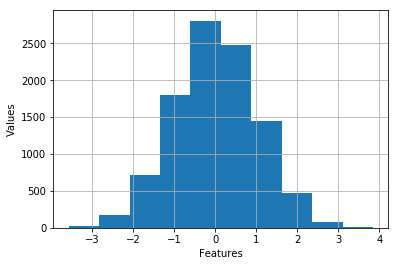

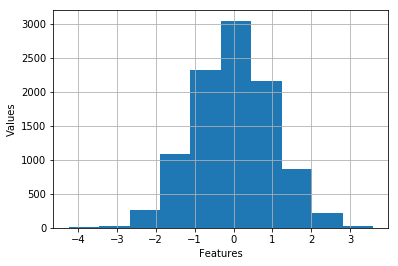

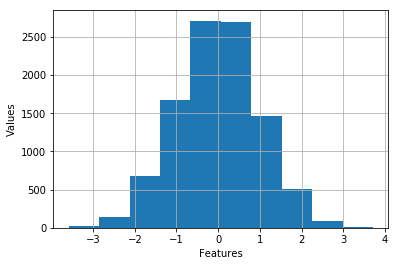

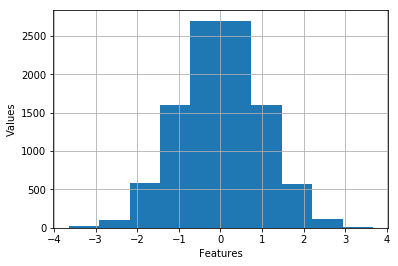

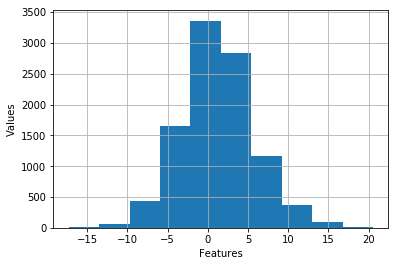

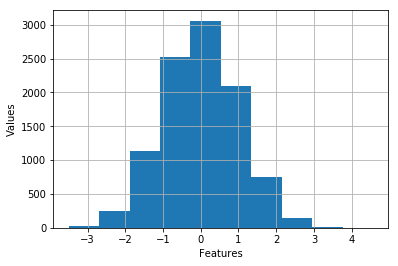

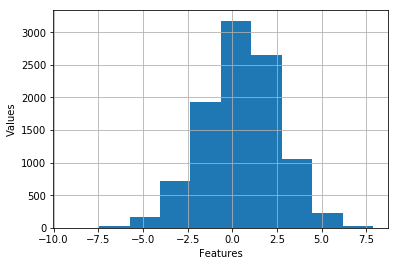

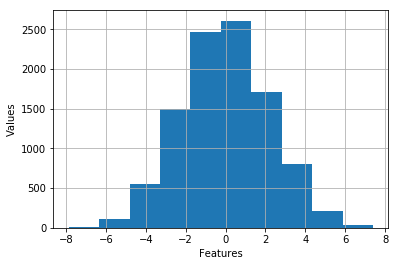

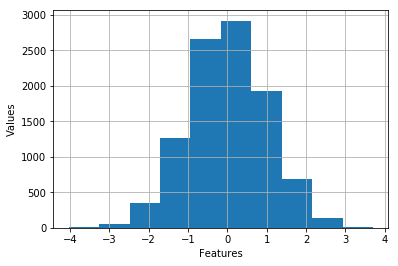

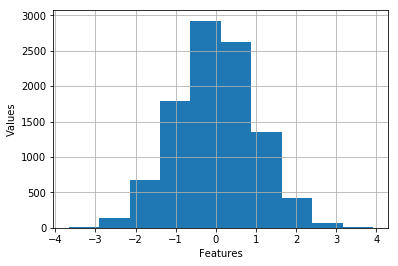

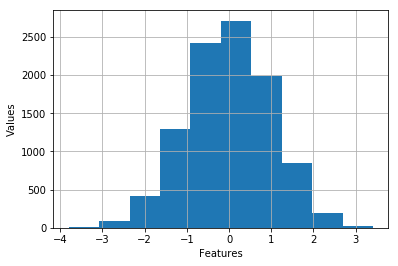

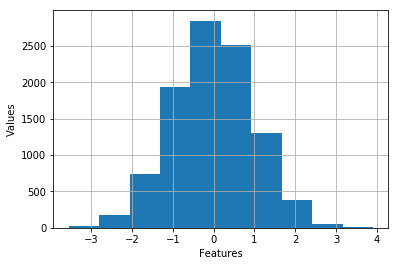

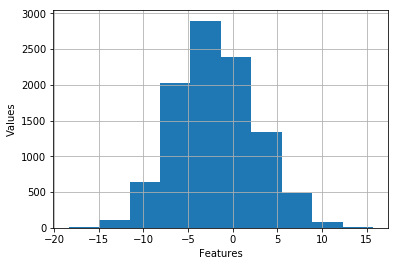

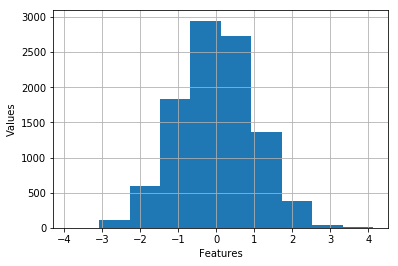

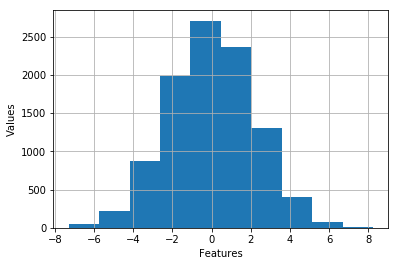

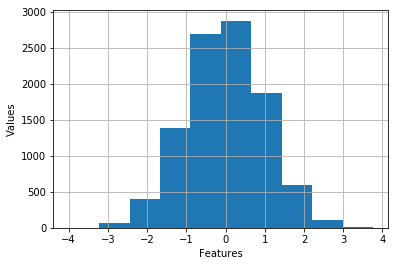

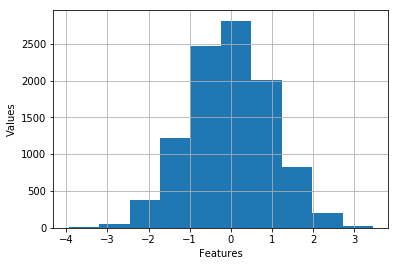

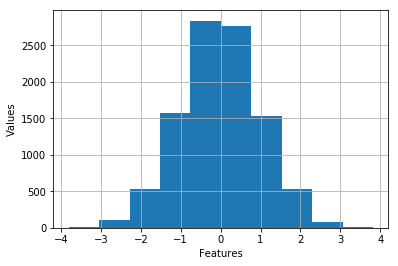

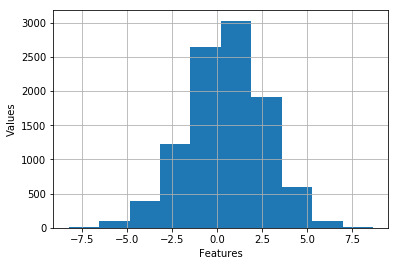

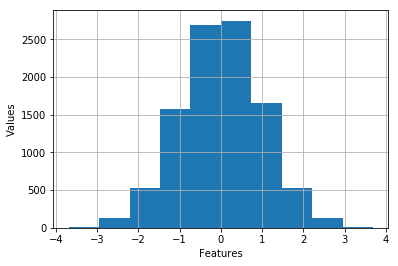

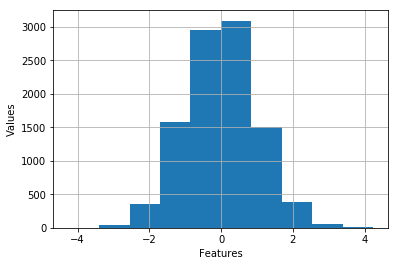

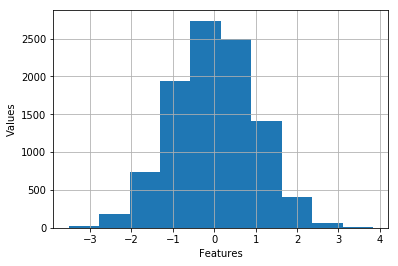

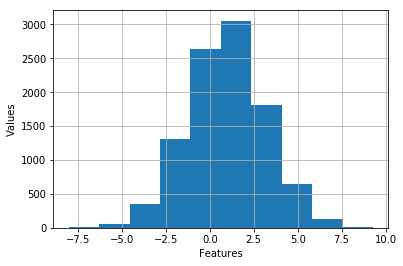

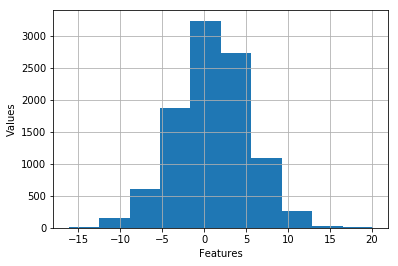

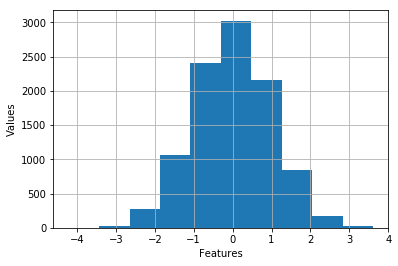

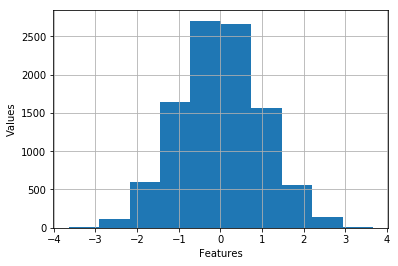

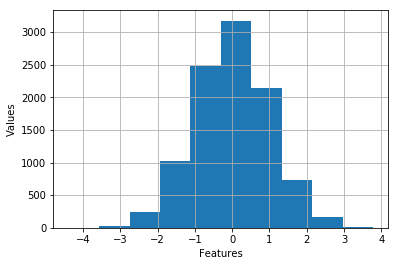

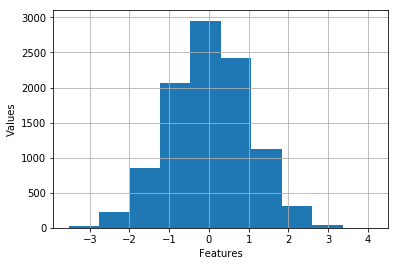

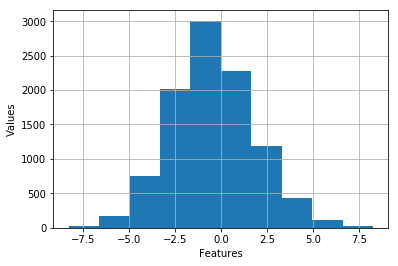

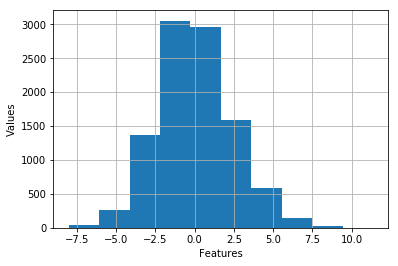

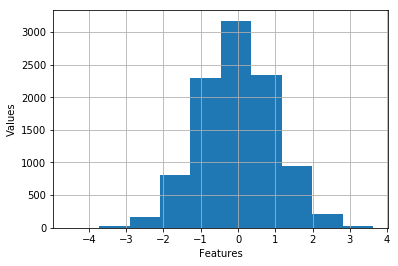

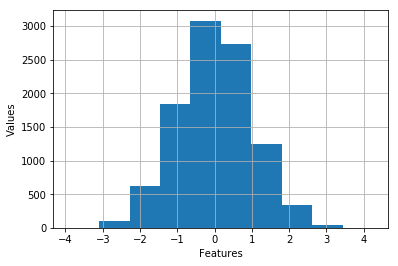

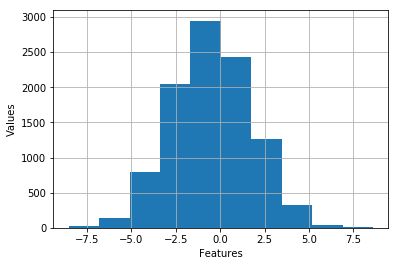

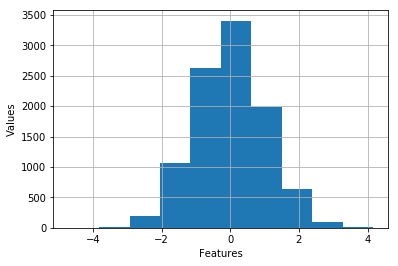

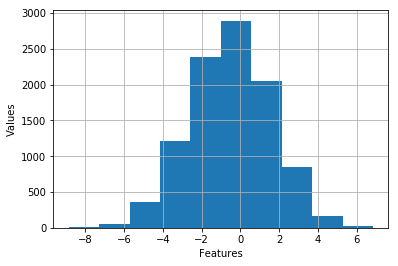

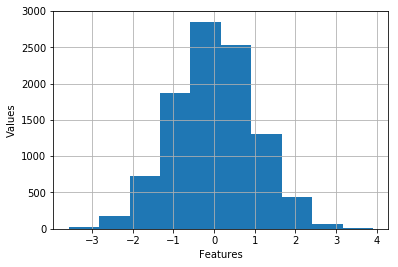

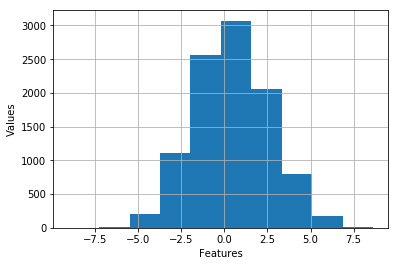

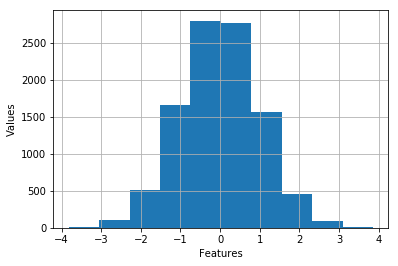

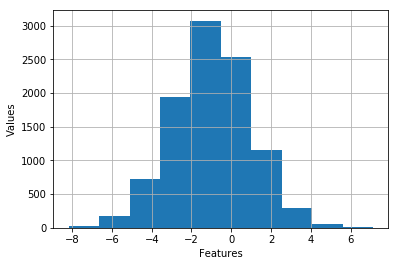

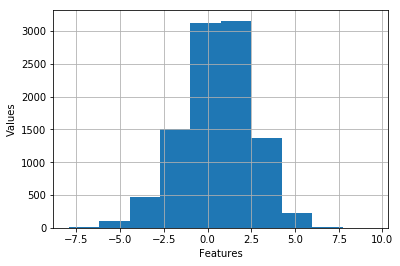

In [5]:
for i in range(0, 40):
    col = df[i]
    col.hist()
    plt.xlabel('Features')
    plt.ylabel('Values') 
    plt.show()

# Use seaborn to draw distplot
# for i in range(0, 40):
#     g = sns.FacetGrid(train)
#     g.map(sns.distplot, i, kde = False)

In [7]:
# df.sample(n = 1000, replace = False, random_state = 5) DataFrame Sampling
# .flatten()：Return copy，所做的修改不會影響原始資料
# .ravel()：Return view，所做的修改會影響原始資料
X, y = df_train, np.array(df_trainLabels).flatten()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Use RFC for classification

In [8]:
# 找出最適的超參數組合
n_estimators = [50, 100, 400, 700, 1000]
criterion = ['gini', 'entropy']
max_depth = [None, 1, 3, 5, 10, 15, 20]
min_samples_split = [2, 3, 4, 10, 12, 16, 20]
min_samples_leaf = [1, 5, 10]
param_grid = dict(n_estimators = n_estimators, criterion = criterion, max_depth = max_depth,
                  min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

RFC = RandomForestClassifier(n_jobs = -1, oob_score = True, random_state = 0)

# 建立搜尋物件，放入模型及參數組合字典 (n_jobs = -1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(RFC, param_grid, scoring = 'accuracy', n_jobs = -1, cv = 3)

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)

# 印出最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.867143 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


In [46]:
# predict test submit
RFC = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 10, 
                             min_samples_split = 3, min_samples_leaf = 1, 
                             n_jobs = -1, oob_score = True, random_state = 0)
RFC.fit(x_train, y_train)
submission = pd.DataFrame(RFC.predict(df_test).astype(int))
submission.columns = ['Solution']
submission['Id'] = np.arange(1, submission.shape[0]+1)
print(submission.shape)
submission.to_csv(f'{data_path}submit_pred_rfc.csv', index = False)

(9000, 2)


 ### Feature Reduction

### Use kNN for classification

KNeighborsClassifier(algorithm='auto', leaf_size = 30, metric = 'minkowski', 
                     metric_params = None, n_jobs = 1, n_neighbors = 5, p = 2,
                     weights = 'uniform')

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# 找出最適的超參數組合
neig = np.arange(1, 25)
weights = ['uniform', 'distance']
p = np.arange(1, 6)
param_grid = dict(n_neighbors = neig, weights = weights, p = p)

knn = KNeighborsClassifier(n_jobs = -1)

# 建立搜尋物件，放入模型及參數組合字典 (n_jobs = -1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(knn, param_grid, scoring = 'accuracy', n_jobs = -1, cv = 3)

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)

# 印出最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.895714 using {'n_neighbors': 8, 'p': 2, 'weights': 'distance'}


In [44]:
# predict test submit
knn = KNeighborsClassifier(n_jobs = -1, weights = 'distance', p = 2)
knn.fit(x_train, y_train)
submission = pd.DataFrame(knn.predict(df_test).astype(int))
submission.columns = ['Solution']
submission['Id'] = np.arange(1, submission.shape[0]+1)
print(submission.shape)
submission.to_csv(f'{data_path}submit_pred_knn.csv', index = False)

(9000, 2)


### Add feature scaling

In [26]:
std = StandardScaler()
X_std = std.fit_transform(X)
mms = MinMaxScaler()
X_mms = mms.fit_transform(X)
norm = Normalizer()
X_norm = norm.fit_transform(X)

In [27]:
# Model complexity
neig = np.arange(1, 30)
kfold = 10
val_accuracy = {'std':[], 'mms':[], 'norm':[]}
bestKnn = None
bestAcc = 0.0
bestScaling = None
# Loop over different values of k
for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    # validation accuracy
    s1 = np.mean(cross_val_score(knn, X_std, y, cv=kfold))
    val_accuracy['std'].append(s1)
    s2 = np.mean(cross_val_score(knn, X_mms, y, cv=kfold))
    val_accuracy['mms'].append(s2)
    s3 = np.mean(cross_val_score(knn, X_norm, y, cv=kfold))
    val_accuracy['norm'].append(s3)
    if s1 > bestAcc:
        bestAcc = s1
        bestKnn = knn
        bestScaling = 'std'
    elif s2 > bestAcc:
        bestAcc = s2
        bestKnn = knn
        bestScaling = 'mms'
    elif s3 > bestAcc:
        bestAcc = s3
        bestKnn = knn
        bestScaling = 'norm'

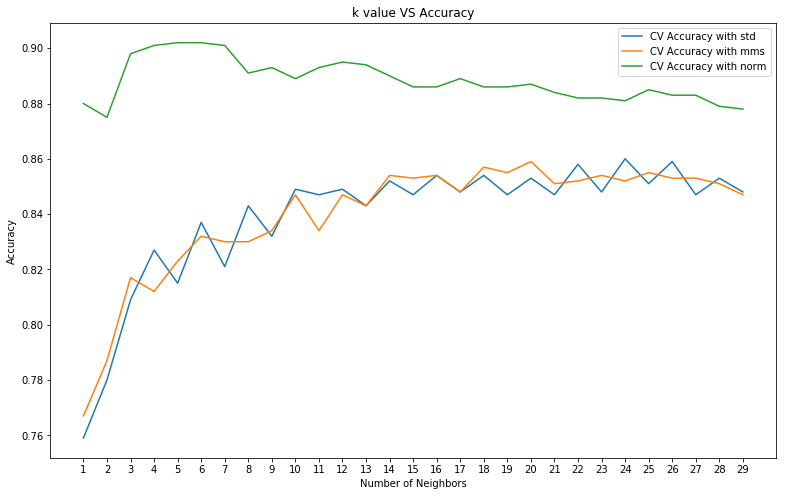

Best Accuracy with feature scaling: 0.902
Best kNN classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Best scaling: norm


In [28]:
# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, val_accuracy['std'], label = 'CV Accuracy with std')
plt.plot(neig, val_accuracy['mms'], label = 'CV Accuracy with mms')
plt.plot(neig, val_accuracy['norm'], label = 'CV Accuracy with norm')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()

print('Best Accuracy with feature scaling:', bestAcc)
print('Best kNN classifier:', bestKnn)
print('Best scaling:', bestScaling)

In [29]:
# predict on test
bestKnn.fit(X_norm, y)
submission = pd.DataFrame(bestKnn.predict(norm.transform(test_fill)))
print(submission.shape)
submission.columns = ['Solution']
submission['Id'] = np.arange(1,submission.shape[0]+1)
submission = submission[['Id', 'Solution']]
submission

(9000, 1)


,Id,Solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0
5,6,0
6,7,0
7,8,1
8,9,0
9,10,0


### Feature Selection

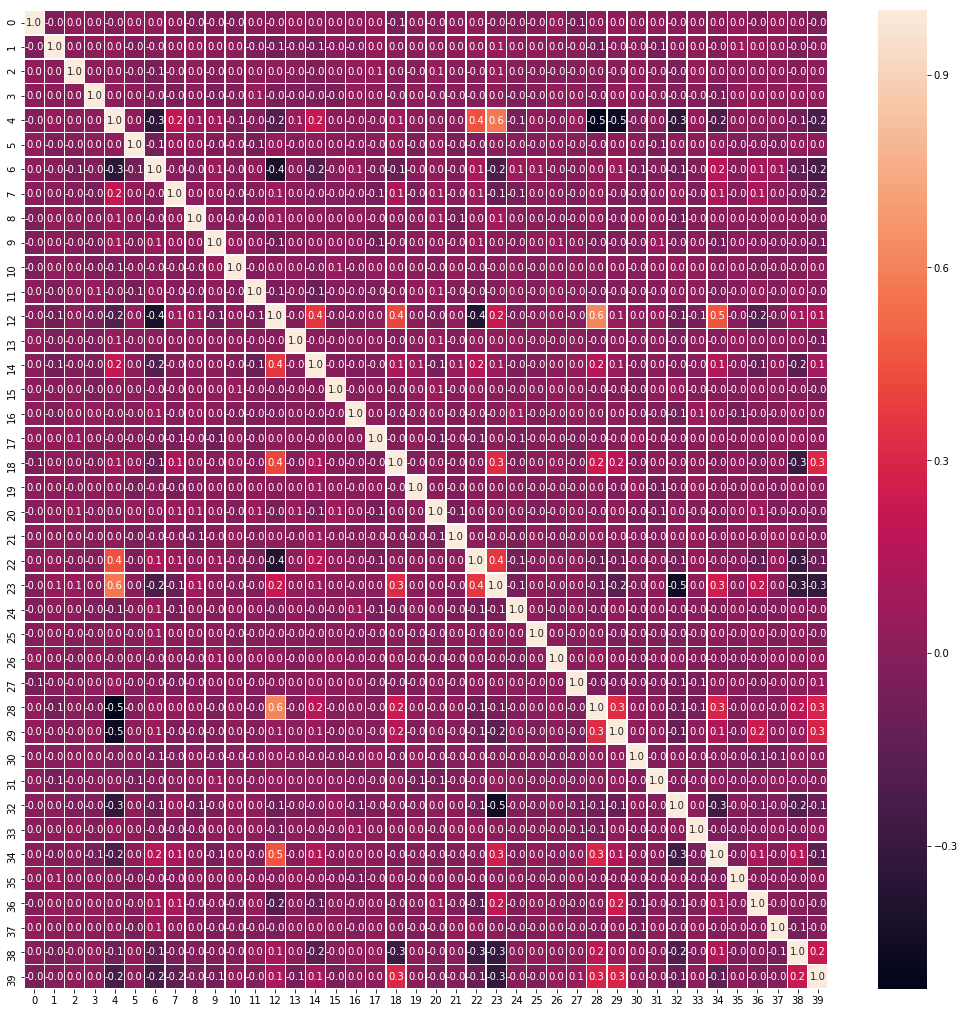

In [31]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(pd.DataFrame(X_std).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Accuracy is:  0.836666666667


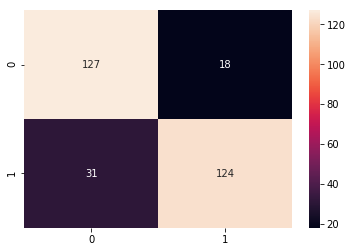

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and val 30 %
X_train, X_val, y_train, y_val = train_test_split(X_std, y, test_size = 0.3, random_state = 42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state = 43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_val,clf_rf.predict(X_val))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_val,clf_rf.predict(X_val))
sns.heatmap(cm,annot = True, fmt = "d")

In [35]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

kfold = 10
bestSVC = None
bestAcc = 0.0
val_accuracy = []
cv_range = np.arange(5, 11)
n_feature = []
for cv in cv_range:
    # Create the RFE object and compute a cross-validated score.
    svc = SVC(kernel="linear")
    # The "accuracy" scoring is proportional to the number of correct
    # classifications
    rfecv = RFECV(estimator=svc, step=1, cv=cv, scoring='accuracy')
    rfecv.fit(X_std, y)

    # print("Optimal number of features : %d" % rfecv.n_features_)
    # print('Best features :', pd.DataFrame(X_train).columns[rfecv.support_])

    # Model complexity
    val_accuracy += [np.mean(cross_val_score(svc, X_std[:, rfecv.support_], y, cv=kfold))]
    n_feature.append(rfecv.n_features_)
    if val_accuracy[-1] > bestAcc:
        bestAcc = val_accuracy[-1]


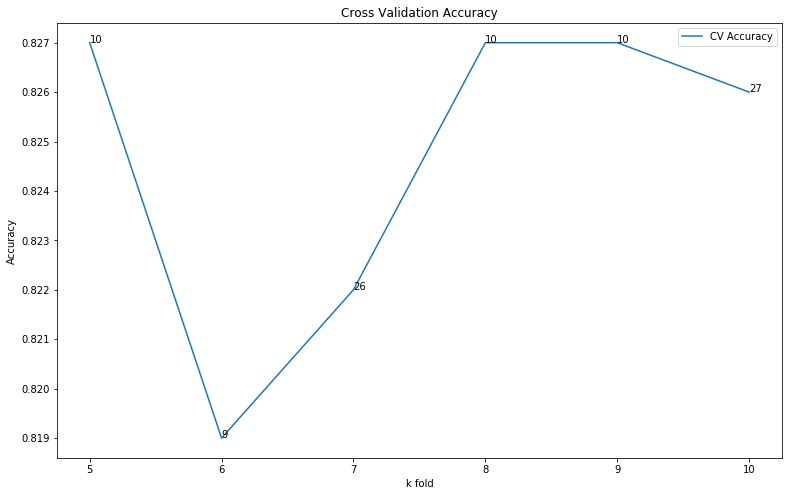

Best Accuracy with feature scaling and RFECV: 0.827


In [36]:
# Plot
plt.figure(figsize=[13,8])
plt.plot(cv_range, val_accuracy, label = 'CV Accuracy')
for i in range(len(cv_range)):
    plt.annotate(str(n_feature[i]), xy=(cv_range[i],val_accuracy[i]))
plt.legend()
plt.title('Cross Validation Accuracy')
plt.xlabel('k fold')
plt.ylabel('Accuracy')
plt.show()

print('Best Accuracy with feature scaling and RFECV:', bestAcc)

In [38]:
import numpy as np
#import sklearn as sk
#import matplotlib.pyplot as plt
import pandas as pd

#from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import Perceptron
#from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import VotingClassifier
#from sklearn import svm

#### READING OUR GIVEN DATA INTO PANDAS DATAFRAME ####
x_train = train
y_train = trainLabels
x_test = test
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_train = y_train.ravel()
print('training_x Shape:',x_train.shape,',training_y Shape:',y_train.shape, ',testing_x Shape:',x_test.shape)

#Checking the models
x_all = np.r_[x_train,x_test]
print('x_all shape :',x_all.shape)

#### USING THE GAUSSIAN MIXTURE MODEL ####
from sklearn.mixture import GaussianMixture
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(x_all)
        bic.append(gmm.aic(x_all))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
best_gmm.fit(x_all)
x_train = best_gmm.predict_proba(x_train)
x_test = best_gmm.predict_proba(x_test)


#### TAKING ONLY TWO MODELS FOR KEEPING IT SIMPLE ####
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

param_grid = dict( )
#### GRID SEARCH for BEST TUNING PARAMETERS FOR KNN #####
grid_search_knn = GridSearchCV(knn,param_grid=param_grid,cv=10,scoring='accuracy').fit(x_train,y_train)
print('best estimator KNN:',grid_search_knn.best_estimator_,'Best Score', grid_search_knn.best_estimator_.score(x_train,y_train))
knn_best = grid_search_knn.best_estimator_

#### GRID SEARCH for BEST TUNING PARAMETERS FOR RandomForest #####
grid_search_rf = GridSearchCV(rf, param_grid=dict( ), verbose=3,scoring='accuracy',cv=10).fit(x_train,y_train)
print('best estimator RandomForest:',grid_search_rf.best_estimator_,'Best Score', grid_search_rf.best_estimator_.score(x_train,y_train))
rf_best = grid_search_rf.best_estimator_


knn_best.fit(x_train,y_train)
print(knn_best.predict(x_test)[0:10])
rf_best.fit(x_train,y_train)
print(rf_best.predict(x_test)[0:10])

#### SCORING THE MODELS ####
print('Score for KNN :',cross_val_score(knn_best,x_train,y_train,cv=10,scoring='accuracy').mean())
print('Score for Random Forest :',cross_val_score(rf_best,x_train,y_train,cv=10,scoring='accuracy').max())

### IN CASE WE WERE USING MORE THAN ONE CLASSIFIERS THEN VOTING CLASSIFIER CAN BE USEFUL ###
#clf = VotingClassifier(
#		estimators=[('knn_best',knn_best),('rf_best',rf_best)],
#		#weights=[871856020222,0.907895269918]
#	)
#clf.fit(x_train,y_train)
#print clf.predict(x_test)[0:10]

##### FRAMING OUR SOLUTION #####
knn_best_pred = pd.DataFrame(knn_best.predict(x_test))
rf_best_pred = pd.DataFrame(rf_best.predict(x_test))
#voting_clf_pred = pd.DataFrame(clf.predict(x_test))

knn_best_pred.index += 1
rf_best_pred.index += 1
#voting_clf_pred.index += 1

rf_best_pred.columns = ['Solution']
rf_best_pred['Id'] = np.arange(1,rf_best_pred.shape[0]+1)
rf_best_pred = rf_best_pred[['Id', 'Solution']]
print(rf_best_pred)

#knn_best_pred.to_csv('knn_best_pred.csv')
rf_best_pred.to_csv('Submission_rf.csv', index=False)
#voting_clf_pred.to_csv('voting_clf_pred.csv')

training_x Shape: (1000, 40) ,training_y Shape: (1000,) ,testing_x Shape: (9000, 40)
x_all shape : (10000, 40)
best estimator KNN: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') Best Score 0.996
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.0s
[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.0s
[CV]  ................................................................
[CV] ...................................... , score=1.0, total=   0.0s
[CV]  ................................................................
[CV] ..................................... , score=0.99, total=   0.0s
[CV]  .....................................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


best estimator RandomForest: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) Best Score 0.998
[1 0 1 0 0 0 0 1 0 0]
[1 0 1 0 0 0 0 1 0 0]
Score for KNN : 0.996
Score for Random Forest : 1.0
        Id  Solution
1        1         1
2        2         0
3        3         1
4        4         0
5        5         0
6        6         0
7        7         0
8        8         1
9        9         0
10      10         0
11      11         1
12      12         1
13      13         0
14      14         0
15      15         0
16      16         1
17      17         0
18      18         0
19      19         1
20      20       